In [74]:
# 遗传算法解决背包问题——性能测试
import numpy as np
from config import KNAPSACK_CAPACITY, ITEMS_NAMES, ITEMS_WEIGHTS, ITEMS_VALUES, ITEMS_NUM


def chromosome_encoding(individual_size: int) -> np.ndarray:
    """
    随机生成一个染色体
    :param individual_size: 染色体长度
    """
    return np.random.randint(0, 2, size=individual_size)


def generate_initial_population(population_size: int, individual_size: int) -> list:
    """
    随机生成一个种群
    :param population_size: 种群大小
    :param individual_size: 染色体长度
    """
    population = []
    for i in range(population_size):
        individual = chromosome_encoding(individual_size)
        population.append(individual)
    return population


def fitness_function(individual: np.ndarray) -> int:
    """
    适应度函数
    :param individual: 个体
    """
    # 个体的总价值
    total_value = sum(individual * ITEMS_VALUES)
    # 个体的总重量
    total_weight = sum(individual * ITEMS_WEIGHTS)
    return total_value if total_weight <= KNAPSACK_CAPACITY else 0


def calculate_probability(population: list) -> np.ndarray:
    """
    计算个体被选中的概率
    :param population: 种群
    """
    fitness = np.array([fitness_function(individual) for individual in population])
    probability = fitness / np.sum(fitness)
    return probability


def roulette_wheel_selection(population: list, parents_num: int = 0) -> list:
    """
    轮盘赌选择
    :param population: 种群
    :param parents_num: 选择的父母个数
    """
    parents_num = len(population) if parents_num == 0 else parents_num
    probability = calculate_probability(population)
    parents = np.random.choice(np.arange(len(population)), size=parents_num, replace=True, p=probability)
    parents = [population[i] for i in parents]
    return parents


def select_best_individual(population: list) -> list:
    """
    选择最优个体
    :param population: 种群
    """
    fitness = np.array([fitness_function(individual) for individual in population])
    best_individual = population[np.argmax(fitness)]
    return best_individual


def tournament_selection(population: list, tournament_size: int = 2, parents_num: int = 0) -> list:
    """
    锦标赛选择
    :param population: 种群
    :param tournament_size: 锦标赛的个体数
    :param parents_num: 选择的父母个数
    """
    parents_num = len(population) if parents_num == 0 else parents_num
    parents = []
    for i in range(parents_num):
        # 随机选择tournament_size个个体
        tournament_individuals = np.random.choice(np.arange(len(population)), size=tournament_size, replace=False)
        tournament_individuals = [population[i] for i in tournament_individuals]
        # 选择适应度最高的个体
        best_individual = select_best_individual(tournament_individuals)
        parents.append(best_individual)
    return parents


def select(population: list, parents_num: int = 0) -> list:
    """
    结合轮盘赌选择和锦标赛选择
    :param population: 种群
    """

    parents = []
    parents_num = len(population) if parents_num == 0 else parents_num
    # 轮盘赌选择一半的父母
    parents.extend(roulette_wheel_selection(population, parents_num=parents_num // 2))
    # 锦标赛选择一半的父母
    parents.extend(tournament_selection(population, parents_num=parents_num - parents_num // 2))
    return parents


def crossover(parents: list) -> list:
    """
    交叉操作
    :param parents: 父母
    """
    children = []
    for i in range(0, len(parents), 2):
        # 随机选择交叉点
        cross_point = np.random.randint(0, len(parents[i]))
        # 交叉
        child1 = np.concatenate((parents[i][:cross_point], parents[i + 1][cross_point:]))
        child2 = np.concatenate((parents[i + 1][:cross_point], parents[i][cross_point:]))
        children.append(child1)
        children.append(child2)
    return children


def mutation(children: list, mutation_rate: float) -> list:
    """
    变异操作
    :param children: 子代
    :param mutation_rate: 变异率
    """
    for i in range(len(children)):
        for j in range(len(children[i])):
            if np.random.rand() < mutation_rate:
                children[i][j] = 1 if children[i][j] == 0 else 0
    return children

第1次迭代，最优解：[1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1]，最优解对应的总价值：13375698，最优解对应的总重量：6381206
第2次迭代，最优解：[0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1]，最优解对应的总价值：13388770，最优解对应的总重量：6383541
第3次迭代，最优解：[1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1]，最优解对应的总价值：13452457，最优解对应的总重量：6318324
第4次迭代，最优解：[1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1]，最优解对应的总价值：13452457，最优解对应的总重量：6318324
第5次迭代，最优解：[1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1]，最优解对应的总价值：13452457，最优解对应的总重量：6318324
第6次迭代，最优解：[1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1]，最优解对应的总价值：13458652，最优解对应的总重量：6395410
第7次迭代，最优解：[1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1]，最优解对应的总价值：13458652，最优解对应的总重量：6395410
第8次迭代，最优解：[1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1]，最优解对应的总价值：13458652，最优解对应的总重量：6395410
第9次迭代，最优解：[1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1]，最优解对应的总价值：13458652，最优解对应的总重量：6395410
第10次迭代，最优解：[1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1]，最优解对应的总价值：13458652，最优解对应的总

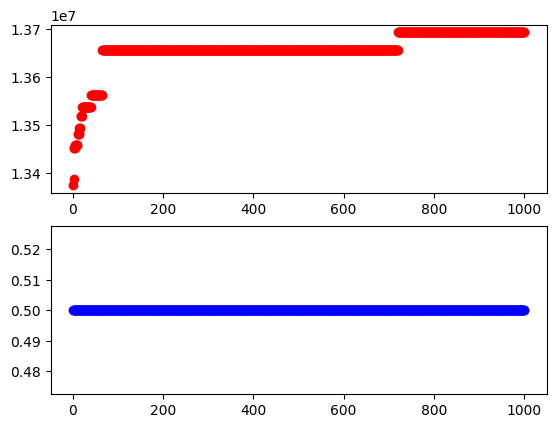

In [77]:
from matplotlib import pyplot as plt

# 种群大小
POPULATION_SIZE = 10000
# 迭代次数
ITERATION_TIMES = 1000
# 变异概率
MUTATION_PROBABILITY = 0.5
learning_rate = 1

history_best_fitness = 0
population = generate_initial_population(POPULATION_SIZE, ITEMS_NUM)
mutation_probability = MUTATION_PROBABILITY
for i in range(ITERATION_TIMES):
    fitness = np.array([fitness_function(individual) for individual in population])
    best_individual = population[np.argmax(fitness)]
    best_fitness = np.max(fitness)
    history_best_fitness = max(history_best_fitness, best_fitness)
    print('第{}次迭代，最优解：{}，最优解对应的总价值：{}，最优解对应的总重量：{}'.format(i + 1, best_individual, best_fitness,
                                                           sum(best_individual * ITEMS_WEIGHTS)))


    # 去除population中fitness为0的个体
    population = [population[i] for i in range(len(population)) if fitness[i] != 0]

    parents = select(population, parents_num=POPULATION_SIZE // 10)
    children = crossover(parents)

    mutation_probability *= learning_rate
    # 绘制在两张图上
    plt.subplot(211)
    plt.plot(i + 1, best_fitness, 'ro')
    plt.subplot(212)
    plt.plot(i + 1, mutation_probability, 'bo')


    children = mutation(children, MUTATION_PROBABILITY)
    population = children + [best_individual]
    population.extend(generate_initial_population(POPULATION_SIZE - len(population), ITEMS_NUM))

fitness = np.array([fitness_function(individual) for individual in population])
best_individual = population[np.argmax(fitness)]
best_fitness = np.max(fitness)
print('最优解：', best_individual)
print('最优解对应的总价值：', best_fitness)
print('最优解对应的总重量：', sum(best_individual * ITEMS_WEIGHTS))
print('历史最优解对应的总价值：', history_best_fitness)
plt.show()

In [78]:
len(population)

10000

In [79]:
fitness

array([       0, 12773938, 12577405, ...,  9255923,        0,        0],
      dtype=int64)

In [68]:
calculate_probability(population)

array([0.        , 0.        , 0.00357063, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0035428 , 0.00367887, 0.00349327, 0.        , 0.00354774,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00344972, 0.00299038, 0.00253973,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0037339 , 0.        , 0.        , 0.00283274,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00385259, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00301965, 0.        , 0.        , 0.00316864,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00373961, 0.        , 0.        ,
       0.        , 0.00399371, 0.00264781, 0.        , 0.        ,
       0.        , 0.        , 0.00341219, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00372033, 0.     